In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

In [4]:
data = pd.read_csv(r'C:\Users\lucia\Desktop\UPGRADE_works\Entrega_1\titanic.csv', encoding='latin1')
df = pd.DataFrame(data)
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [5]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
total_elements = df.size
num_columnas = len(df.columns)
num_filas = total_elements // num_columnas
(num_filas, num_columnas)

(891, 12)

In [7]:
df.duplicated().sum()
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
valores_nulos_porcentaje = df.isnull().sum() / len(df) * 100
print(valores_nulos_porcentaje)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [9]:
# Gráfico de barras con Plotly para ver los valores nulos
fig = px.bar(x=valores_nulos_porcentaje.index, y=valores_nulos_porcentaje.values, labels={'x': 'Columnas', 'y': 'Porcentaje sobre categoría'}, title='Porcentaje de valores nulos sobre 100%')
fig.update_layout(title_x=0.5)
fig.update_yaxes(range=[0, 100])
fig.show()

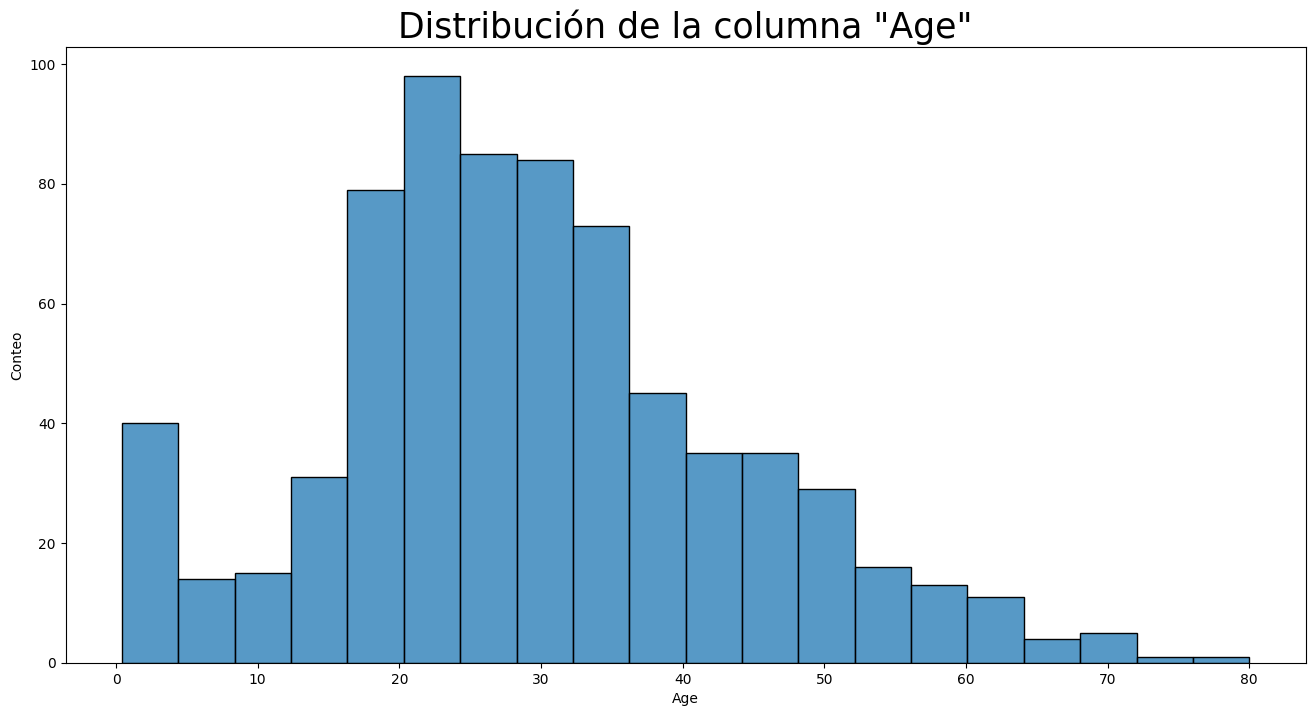

In [10]:
#Distribución datos columna "Age"
plt.figure(figsize=(16, 8))
sns.histplot(df['Age'])
plt.title('Distribución de la columna "Age"', size=25)
plt.ylabel('Conteo');
#Los datos sugieren utilizar la mediana para rellenar los valores nulos

In [11]:
from scipy.stats import shapiro
stat, p = shapiro(df['Age'].dropna()) # Usamos dropna() para eliminar valores NaN
print('Estadístico de prueba (W):', stat)
print('Valor p:', p)



Estadístico de prueba (W): 0.9814577414504954
Valor p: 7.337348958673592e-08


In [12]:
#La mediana de la columna "Age"
df['Age'].median()

28.0

In [13]:
#Rellenamos los valores nulos de la columna "Age" con la mediana
df['Age'].fillna(df['Age'].median(), inplace=True)


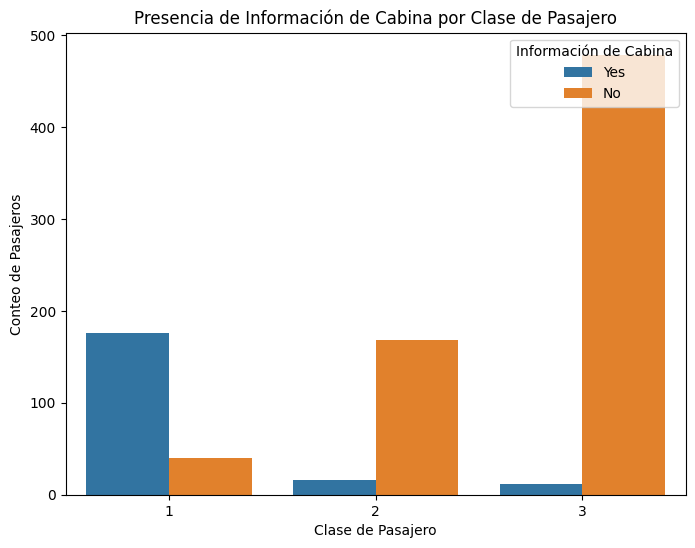

In [14]:
#Cabin
df['Has_Cabin'] = df['Cabin'].apply(lambda x: 'Yes' if pd.notna(x) else 'No')
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Has_Cabin', data=df)
plt.title('Presencia de Información de Cabina por Clase de Pasajero')
plt.xlabel('Clase de Pasajero')
plt.ylabel('Conteo de Pasajeros')
plt.legend(title='Información de Cabina', loc='upper right')
plt.show()


In [15]:
#Rellenamos los valores nulos de la columna "Embarked" con "Sin datos de embarque"
df["Embarked"].fillna("Sin datos de embarque", inplace=True)

In [16]:
#Comprobamos que no hay valores nulos
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Has_Cabin        0
dtype: int64

In [17]:
#Dividir edad por ciclos vitales
bins = [0, 12, 18, 27, 60, 80]
labels = ['Niño', 'Adolescente', 'Joven', 'Adulto', 'Persona mayor']
df['Edad_Tramo'] = pd.cut(df['Age'], bins=bins, labels=labels)


#Según https://www.minsalud.gov.co/proteccionsocial/Paginas/cicloVida.aspx#:~:text=La%20siguiente%20clasificaci%C3%B3n%20es%20un,(60%20a%C3%B1os%20y%20m%C3%A1s).

In [18]:
df.head(0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,Edad_Tramo


In [19]:
#Personas por edad en tramos vitales
personas_por_tramo_edad= df['Edad_Tramo'].value_counts()
print(personas_por_tramo_edad)



Adulto           532
Joven            198
Adolescente       70
Niño              69
Persona mayor     22
Name: Edad_Tramo, dtype: int64


In [20]:
personas_sobrevivieron_por_tramo_edad = df[df['Survived'] == 1]['Edad_Tramo'].value_counts() #Creando un filtro para las personas que sobrevivieron utilizando la columna 'Survived' con valor 1 (Booleano, binario) y contando por género
print(personas_sobrevivieron_por_tramo_edad) 

Adulto           196
Joven             71
Niño              40
Adolescente       30
Persona mayor      5
Name: Edad_Tramo, dtype: int64


In [21]:
supervivientes_por_tramo_edad_porcentual = df[df['Survived'] == 1]['Edad_Tramo'].value_counts() / df['Edad_Tramo'].value_counts() * 100
print(supervivientes_por_tramo_edad_porcentual)

Niño             57.971014
Adolescente      42.857143
Joven            35.858586
Adulto           36.842105
Persona mayor    22.727273
Name: Edad_Tramo, dtype: float64


In [22]:
df['supervivientes_por_tramo_edad_porcentual'] = supervivientes_por_tramo_edad_porcentual
fig = px.bar(x=df['Edad_Tramo'].value_counts().index, y=supervivientes_por_tramo_edad_porcentual.values, labels={'x': 'Columnas', 'y': 'Porcentaje sobre categoría'}, title='Porcentaje de supervivientes por tramo de edad sobre 100%')
fig.update_layout(title_x=0.5)
fig.update_yaxes(range=[0, 100])
fig.show()


In [23]:
# Edad máxima y mínima de los pasajeros del Titanic
edad_máxima = df['Age'].max()
edad_mínima = df['Age'].min()
print(edad_mínima, edad_máxima)


0.42 80.0


In [24]:
#Precio mínimo y máximo de la columna "Fare"
precio_mínimo = df['Fare'].min()
precio_máximo = df['Fare'].max()
print(precio_mínimo, precio_máximo)

0.0 512.3292


In [25]:
#Modificamos la columna 'Fare' para que esté expresada en libras de hoy
Factor_conversión = 95.42 # 1 libra de 1912 equivale a 95.42 libras de 2024, según https://www.bankofengland.co.uk/monetary-policy/inflation/inflation-calculator
df['Fare'] = df['Fare'] * Factor_conversión
df['Fare']

0       691.795000
1      6801.852486
2       756.203500
3      5066.802000
4       768.131000
          ...     
886    1240.460000
887    2862.600000
888    2237.599000
889    2862.600000
890     739.505000
Name: Fare, Length: 891, dtype: float64

In [26]:
#Precio mínimo y máximo de la columna "Fare"
precio_mínimo = df['Fare'].min()
precio_máximo = df['Fare'].max()
print(precio_mínimo, precio_máximo)

0.0 48886.452264


In [27]:
#Número de pasajeros embarcados en cada puerto
df['Embarked'].value_counts() #Recuerda que C = Cherbourg, Q = Queenstown, S = Southampton


S                        644
C                        168
Q                         77
Sin datos de embarque      2
Name: Embarked, dtype: int64

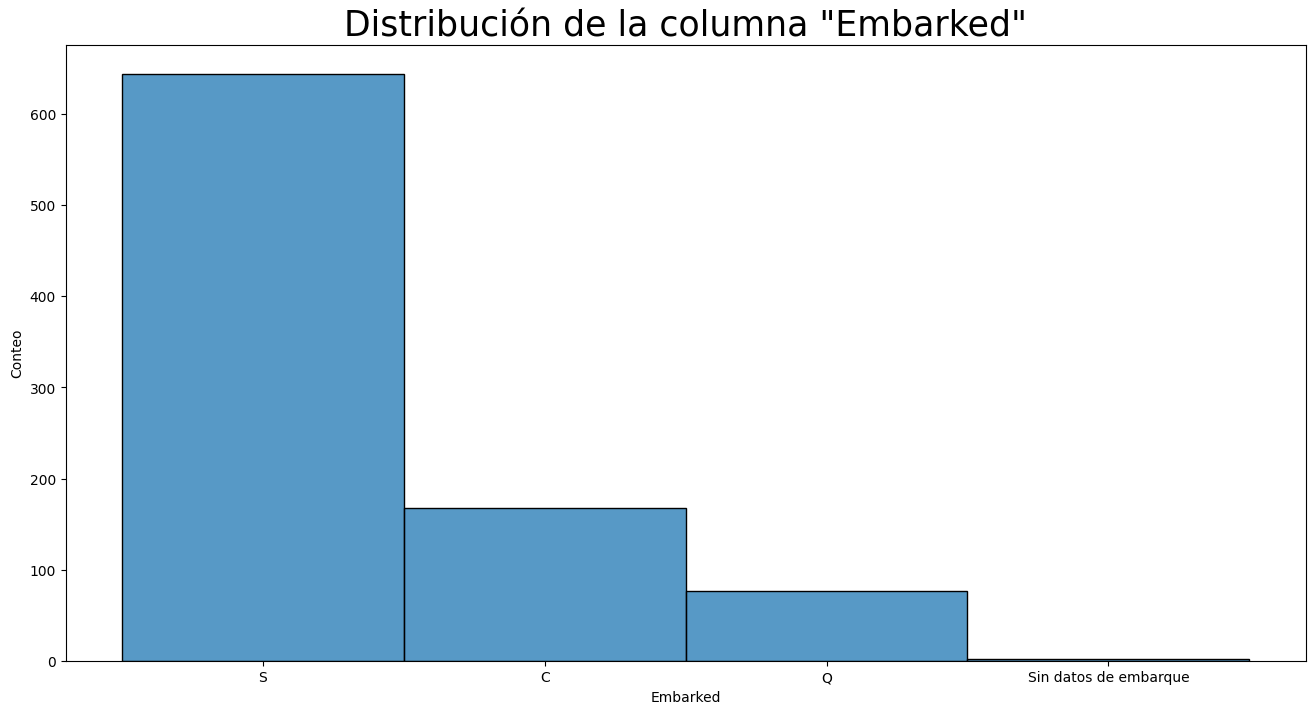

In [28]:
#Distribución datos columna "Embarked"
plt.figure(figsize=(16, 8))
sns.histplot(df['Embarked'])
plt.title('Distribución de la columna "Embarked"', size=25)
plt.ylabel('Conteo');

In [29]:
#Número de pasajeros en total
número_pasajeros = len(df)
print(número_pasajeros)

891


In [30]:
#Personas embarcadas por género
personas_por_genero = df['Sex'].value_counts()
print(personas_por_genero)

male      577
female    314
Name: Sex, dtype: int64


In [31]:
import plotly.graph_objects as go
x_values = ['Mujer', 'Hombre']
y_values = [314, 577]
fig = go.Figure(data=[go.Bar(x=x_values, y=y_values, text=y_values, textposition='auto')])
fig.update_layout(title='Embarcados por género', title_x=0.5)
fig.update_yaxes(range=[0, 600])
fig.show()

In [32]:
#Personas que sobrevivieron por género
personas_sobrevivieron_por_genero = df[df['Survived'] == 1]['Sex'].value_counts() #Creando un filtro para las personas que sobrevivieron utilizando la columna 'Survived' con valor 1 (Booleano, binario) y contando por género
print(personas_sobrevivieron_por_genero) 

female    233
male      109
Name: Sex, dtype: int64


In [33]:
supervivientes_por_genero_porcentual = personas_sobrevivieron_por_genero / df['Sex'].value_counts() * 100
print(supervivientes_por_genero_porcentual)


female    74.203822
male      18.890815
Name: Sex, dtype: float64


In [34]:
import plotly.graph_objects as go
x_values = ['Mujer', 'Hombre']
y_values = [74.203822, 18.890815]
fig = go.Figure(data=[go.Bar(x=x_values, y=y_values, text=y_values, textposition='auto')])
fig.update_layout(title='Porcentaje de supervivencia por género', title_x=0.5)
fig.update_yaxes(range=[0, 100])
fig.show()

In [35]:
#Vemos que la mayoría de las personas que sobrevivieron fueron mujeres. ¿Qué pasa con la edad?
#Personas que sobrevivieron por edad
personas_sobrevivieron_por_edad=df[df['Survived'] == 1]['Age'].value_counts() #Creando un filtro para las personas que sobrevivieron utilizando la columna 'Survived' con valor 1 (Booleano, binario) y contando por edad
print(personas_sobrevivieron_por_edad)

28.00    59
24.00    15
35.00    11
27.00    11
36.00    11
         ..
55.00     1
32.50     1
12.00     1
0.92      1
47.00     1
Name: Age, Length: 65, dtype: int64


In [36]:
#Personas que sobrevivieron por edad
fig=px.histogram(df[df['Survived'] == 1], x='Age', title='Personas que sobrevivieron por edad')
fig.update_layout(title_x=0.5)
fig.show()
#Se ve que la mayoría de las personas que sobrevivieron tenían entre 20 y 30 años (los jóvenes sobreviven más)

In [37]:
personas_por_genero_clase = df[['Sex', 'Pclass']].value_counts()
print(personas_por_genero_clase)

Sex     Pclass
male    3         347
female  3         144
male    1         122
        2         108
female  1          94
        2          76
dtype: int64


In [38]:
#Personas que sobrevivieron por género y clase
personas_sobrevivieron_por_genero_clase = df[df['Survived'] == 1][['Sex', 'Pclass']].value_counts()
print(personas_sobrevivieron_por_genero_clase)


Sex     Pclass
female  1         91
        3         72
        2         70
male    3         47
        1         45
        2         17
dtype: int64


In [39]:
personas_sobrevivieron_por_genero_clase / personas_por_genero_clase *100 #NO IMPORTA

Sex     Pclass
female  1         96.808511
        2         92.105263
        3         50.000000
male    1         36.885246
        2         15.740741
        3         13.544669
dtype: float64

In [40]:
#Personas por tramo de edad y clase
personas_por_tramo_edad_clase = df[['Edad_Tramo', 'Pclass']].value_counts() #NO IMPORTA
print(personas_por_tramo_edad_clase)

Edad_Tramo     Pclass
Adulto         3         270
               1         154
Joven          3         122
Adulto         2         108
Niño           3          48
Adolescente    3          46
Joven          2          44
               1          32
Niño           2          17
Persona mayor  1          14
Adolescente    1          12
               2          12
Persona mayor  3           5
Niño           1           4
Persona mayor  2           3
dtype: int64


In [41]:
#Personas que sobrevivieron por edad y clase
personas_sobrevivieron_por_tramo_edad_clase = df[df['Survived'] == 1][['Edad_Tramo', 'Pclass']].value_counts()
print(personas_sobrevivieron_por_tramo_edad_clase)

Edad_Tramo     Pclass
Adulto         1         95
               3         55
               2         46
Joven          3         30
               1         24
Niño           3         20
               2         17
Joven          2         17
Adolescente    3         13
               1         11
               2          6
Niño           1          3
Persona mayor  1          3
               2          1
               3          1
dtype: int64


In [42]:
supervivientes_por_tramo_edad_clase_porcentual = personas_sobrevivieron_por_tramo_edad_clase / personas_por_tramo_edad_clase * 100
print(supervivientes_por_tramo_edad_clase_porcentual)


Edad_Tramo     Pclass
Adolescente    1          91.666667
               2          50.000000
               3          28.260870
Adulto         1          61.688312
               2          42.592593
               3          20.370370
Joven          1          75.000000
               2          38.636364
               3          24.590164
Niño           1          75.000000
               2         100.000000
               3          41.666667
Persona mayor  1          21.428571
               2          33.333333
               3          20.000000
dtype: float64


In [43]:
#Supervivientes por clase
supervivientes_por_clase = df[df['Survived'] == 1]['Pclass'].value_counts()
supervivientes_por_clase_porcentual = supervivientes_por_clase / df['Pclass'].value_counts() * 100
print(supervivientes_por_clase)
print(supervivientes_por_clase_porcentual)


1    136
3    119
2     87
Name: Pclass, dtype: int64
1    62.962963
2    47.282609
3    24.236253
Name: Pclass, dtype: float64


In [44]:
import plotly.graph_objects as go
x_values = ['Clase 1', 'Clase 2', 'Clase 3']
y_values = [62.962963, 47.282609, 24.236253]
fig = go.Figure(data=[go.Bar(x=x_values, y=y_values, text=y_values, textposition='auto')])
fig.update_layout(title='Porcentaje de supervivencia por clase', title_x=0.5)
fig.update_yaxes(range=[0, 100])
fig.show()

C:\Users\lucia\AppData\Local\Temp\ipykernel_5924\3181983010.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



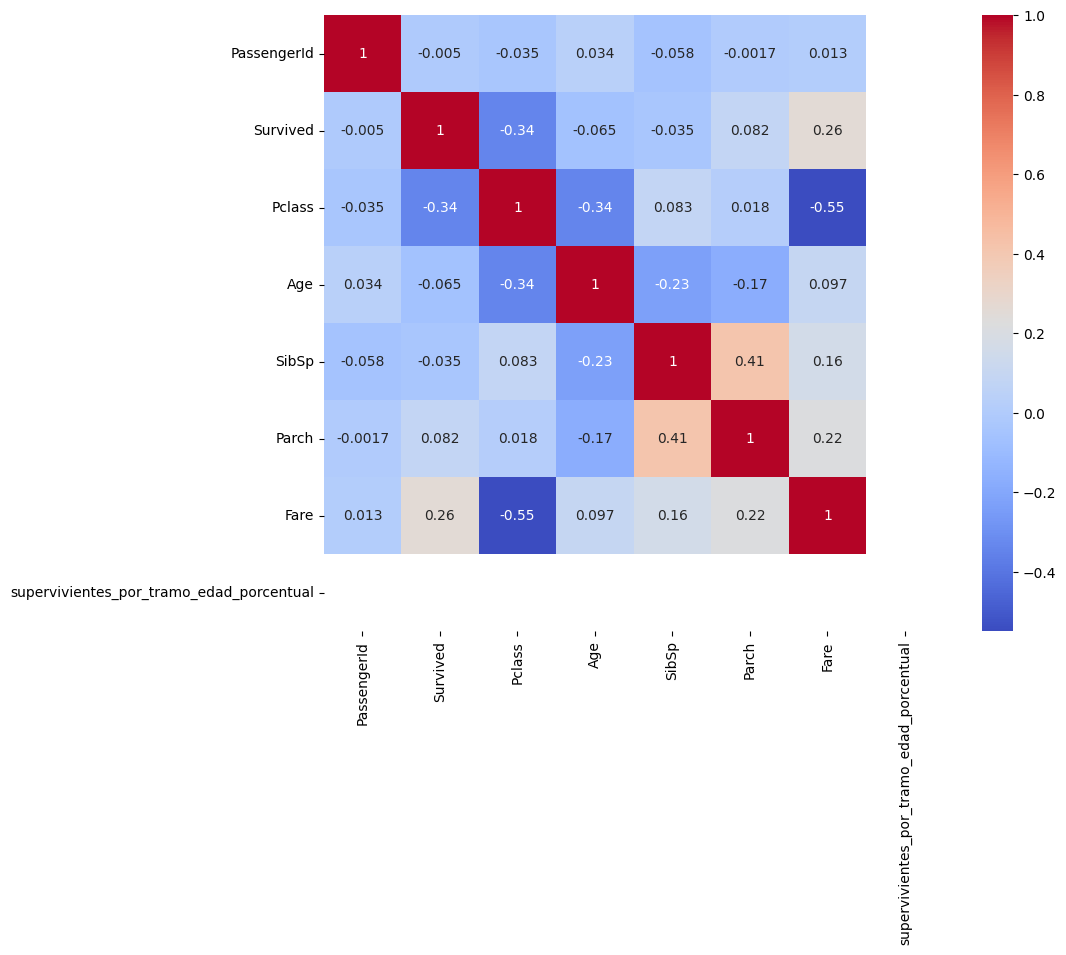

In [45]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

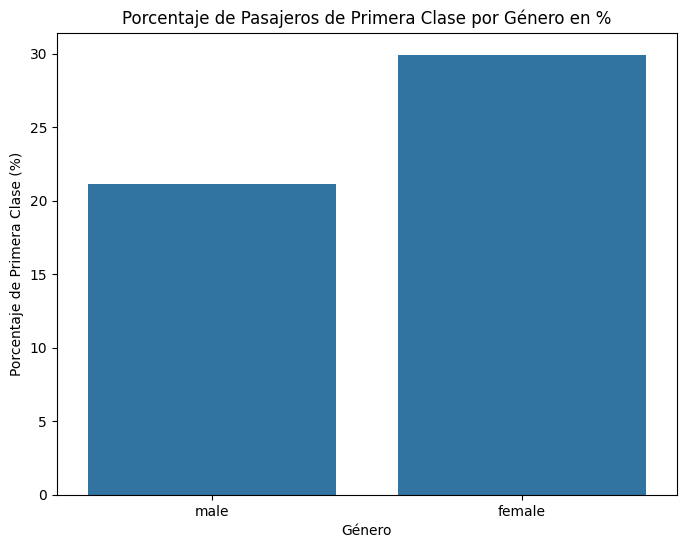

In [46]:
#Ir en primera clase por género
# Calcula el total de pasajeros masculinos y femeninos
total_gender = df['Sex'].value_counts()

# Calcula el número de pasajeros masculinos y femeninos en primera clase
first_class_gender = df[df['Pclass'] == 1]['Sex'].value_counts()

# Calcula el porcentaje de pasajeros masculinos y femeninos en primera clase respecto al total de cada género
percentage_first_class = (first_class_gender / total_gender) * 100

# Crea el gráfico de barras para los porcentajes
plt.figure(figsize=(8, 6))
sns.barplot(x=percentage_first_class.index, y=percentage_first_class.values)
plt.title('Porcentaje de Pasajeros de Primera Clase por Género en %')
plt.xlabel('Género')
plt.ylabel('Porcentaje de Primera Clase (%)')
plt.show()

In [47]:
#SDO or biased ATE
df['FirstClass'] = df['Pclass'].apply(lambda x: 1 if x == 1 else 0)
print('Mean Survival in First Class:', 100 * df[df['FirstClass'] == 1]['Survived'].mean())
print('Mean Survival in Non-First Class:', 100 * df[df['FirstClass'] == 0]['Survived'].mean())

Mean Survival in First Class: 62.96296296296296
Mean Survival in Non-First Class: 30.518518518518515


In [48]:
df['AgeGroup'] = np.where(df['Age'] >= 27, 'old', 'young')

In [49]:
df['Demographic'] = df['Sex'] + '-' + df['AgeGroup']

In [50]:
df['Demographic'].unique()

array(['male-young', 'female-old', 'female-young', 'male-old'],
      dtype=object)

In [51]:
# Initialize variables to store the total weighted effect and the total weight
average_weighted_effect = 0

# Total number of observations in the entire dataset
total_obs = df.shape[0]

# Loop through each unique value in the 'Demographic' column
for demographic in df['Demographic'].unique():
    # Filter the DataFrame for the current demographic group
    group_df = df[df['Demographic'] == demographic]
    
    # Calculate the total number of observations in the group
    group_obs = group_df.shape[0]
    
    # Calculate the difference in means for 'Survived' based on 'FirstClass'
    diff = group_df[group_df['FirstClass'] == 1]['Survived'].mean() - group_df[group_df['FirstClass'] == 0]['Survived'].mean()
    
    # Calculate the weight as the proportion of total observations that are in this group
    weight = group_obs / total_obs
    
    # Compute the weighted effect
    weighted_effect = diff * weight
    
    # Add the weighted effect to the total weighted effect
    average_weighted_effect = (average_weighted_effect + weighted_effect)

In [53]:
# Display the final weighted average effect
print('Weighted Average Effect: {:.2f}%'.format(average_weighted_effect * 100))

Weighted Average Effect: 28.75%
